### Шаг 1. Откроем файл с данными и изучим общую информацию. 

In [2]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [4]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]
print(f'Количество пропущенных значений:\n{missing_values}')
missing_values = missing_values/data.shape[0]
print(f'\nКоличество пропущенных значений в процентах:\n{missing_values *100} %')

Количество пропущенных значений:
total_income     2174
days_employed    2174
dtype: int64

Количество пропущенных значений в процентах:
total_income     10.099884
days_employed    10.099884
dtype: float64 %


In [5]:
data[data['total_income'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 12 to 21510
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          2174 non-null   int64  
 1   days_employed     0 non-null      float64
 2   dob_years         2174 non-null   int64  
 3   education         2174 non-null   object 
 4   education_id      2174 non-null   int64  
 5   family_status     2174 non-null   object 
 6   family_status_id  2174 non-null   int64  
 7   gender            2174 non-null   object 
 8   income_type       2174 non-null   object 
 9   debt              2174 non-null   int64  
 10  total_income      0 non-null      float64
 11  purpose           2174 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 220.8+ KB


Если у человека не указан трудовой стаж, у него также не указан ежемесячный доход. Возможно эти данные не заполнены в силу человеческого фактора - забыли ввести, либо потерялись.

In [6]:
data[data['total_income'].isnull()]['income_type'].value_counts()

сотрудник          1105
компаньон           508
пенсионер           413
госслужащий         147
предприниматель       1
Name: income_type, dtype: int64

У людей с разным типом занятости, может быть не указан стаж и доход.

In [7]:
data.columns

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

В данных 21525 наблюдений (строки) и 12 признаками (столбцы). 7 признаков (children, days_employed, dob_years, education_id, family_status_id, debt, total_income) - количественные и 5 признаков (education, family_status, gender, income_type, purpose) - категорилаьные.

Выявлены явные пропуски в количественых данных - в столбцах days_employed и total_income 10% пропущенных значений. 

In [8]:
data[data.duplicated()].shape[0]

54

В данных присутствуют дубликаты.

### Исследование данных

#### children - количество детей

In [10]:
data['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Понятно, что "-1" и "20" - это ошибочные значения. Возможно, -1 значит, что у человека нет детей. Возможно, минус - это опечатка, то есть у человека 1 ребенок. Выберем второй вариант, будем считать, что знак минус поставлен ошибочно, когда у человека 1 ребенок. 

In [11]:
data[data['children'] == 20]['debt'].sum()

8

20 будем считать опечаткой, заменим на 2.

#### days_employed - трудовой стаж в днях

In [12]:
data['days_employed'].describe()

count     19351.000000
mean      63046.497661
std      140827.311974
min      -18388.949901
25%       -2747.423625
50%       -1203.369529
75%        -291.095954
max      401755.400475
Name: days_employed, dtype: float64

Понятно, что трудовой стаж в днях - не может быть отрицательным числом. Ожидаемо, что трубовой стаж в днях - это целое положительное число.

In [13]:
data[data['days_employed'].isnull()]['income_type'].value_counts()

сотрудник          1105
компаньон           508
пенсионер           413
госслужащий         147
предприниматель       1
Name: income_type, dtype: int64

Видим, что трудовой стаж не указана для людей с разным типом занятости. Поэтому мы не можем пропущенные значения заменять на 0, как если бы данные были пропущены для берзаботных.

#### dob_years - возраст

In [14]:
data.dob_years.describe()

count    21525.000000
mean        43.293380
std         12.574584
min          0.000000
25%         33.000000
50%         42.000000
75%         53.000000
max         75.000000
Name: dob_years, dtype: float64

In [15]:
data.dob_years.median() # медианный возраст ожидаемо совпадает со средним 

42.0

In [16]:
data[data['dob_years'] == 0]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
99,0,346541.618895,0,Среднее,1,женат / замужем,0,F,пенсионер,0,71291.522491,автомобиль
149,0,-2664.273168,0,среднее,1,в разводе,3,F,сотрудник,0,70176.435951,операции с жильем
270,3,-1872.663186,0,среднее,1,женат / замужем,0,F,сотрудник,0,102166.458894,ремонт жилью
578,0,397856.565013,0,среднее,1,женат / замужем,0,F,пенсионер,0,97620.687042,строительство собственной недвижимости
1040,0,-1158.029561,0,высшее,0,в разводе,3,F,компаньон,0,303994.134987,свой автомобиль
...,...,...,...,...,...,...,...,...,...,...,...,...
19829,0,NaN,0,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,жилье
20462,0,338734.868540,0,среднее,1,женат / замужем,0,F,пенсионер,0,259193.920299,покупка своего жилья
20577,0,331741.271455,0,среднее,1,Не женат / не замужем,4,F,пенсионер,0,129788.762899,недвижимость
21179,2,-108.967042,0,высшее,0,женат / замужем,0,M,компаньон,0,240702.007382,строительство жилой недвижимости


Понятно, что нулевой возраст - это ошибочное значение. Обнаружены скрытые пропуски. Необходимо заменить их на средний возраст.

#### education, education_id - образование

In [17]:
data['education'].value_counts()

среднее                13750
высшее                  4718
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   274
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education, dtype: int64

На самом деле необходимо оставить всего 5 категорий - неоконченное среднее (начальное), среднее, неоконченное высшее, высшее, ученая степень. Такие дубликаты присутвтуют, так как скоре всего данные собирались разным людьми / загружались из разных источников, и поэтому разные люди могли заполнять данные по разным правилам написания / шаблонам.

Также в таблице не указан clinet_id, уникальный номер для каждого клиента и поэтому не было возможности проверить - есть ли уже информация о клиенте в данных  или нет.

In [18]:
data['education_id'].value_counts()

1    15233
0     5260
2      744
3      282
4        6
Name: education_id, dtype: int64

Похоже, что столбцы education и education_id дублируют информацию.

In [19]:
data[data['education_id'] == 0]['education'].unique()

array(['высшее', 'ВЫСШЕЕ', 'Высшее'], dtype=object)

In [20]:
data[data['education_id'] == 1]['education'].unique()

array(['среднее', 'Среднее', 'СРЕДНЕЕ'], dtype=object)

In [21]:
data[data['education_id'] == 2]['education'].unique()

array(['неоконченное высшее', 'НЕОКОНЧЕННОЕ ВЫСШЕЕ',
       'Неоконченное высшее'], dtype=object)

In [22]:
data[data['education_id'] == 3]['education'].unique()

array(['начальное', 'НАЧАЛЬНОЕ', 'Начальное'], dtype=object)

In [23]:
data[data['education_id'] == 4]['education'].unique()

array(['Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'], dtype=object)

Да, education_id это категаризованный столбец education.

#### family_status и family_status_id - семейное положние

In [24]:
data['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

In [25]:
data['family_status_id'].value_counts()

0    12380
1     4177
4     2813
3     1195
2      960
Name: family_status_id, dtype: int64

Столбец family_status_id это категоризованный столбец family_status.

#### gender

In [26]:
data['gender'].value_counts()

F      14236
M       7288
XNA        1
Name: gender, dtype: int64

In [27]:
data[data['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
10701,0,-2358.600502,24,неоконченное высшее,2,гражданский брак,1,XNA,компаньон,0,203905.157261,покупка недвижимости


#### income_type - тип занятости

In [28]:
data['income_type'].value_counts()

сотрудник          11119
компаньон           5085
пенсионер           3856
госслужащий         1459
безработный            2
предприниматель        2
в декрете              1
студент                1
Name: income_type, dtype: int64

#### debt - есть ли задолженность

In [29]:
data['debt'].value_counts()

0    19784
1     1741
Name: debt, dtype: int64

In [30]:
print('Доля должников {:.2%}'.format(data['debt'].value_counts()[1]/len(data['debt'])))

Доля должников 8.09%


#### total_income - ежемесячный доход

In [31]:
data.total_income.describe()

count    1.935100e+04
mean     1.674223e+05
std      1.029716e+05
min      2.066726e+04
25%      1.030532e+05
50%      1.450179e+05
75%      2.034351e+05
max      2.265604e+06
Name: total_income, dtype: float64

In [32]:
data.total_income.median()

145017.93753253992

В выборке представлены люди с высоким средним уровнем дохода.

#### purpose - цель кредита

In [33]:
data.purpose.value_counts()

свадьба                                   797
на проведение свадьбы                     777
сыграть свадьбу                           774
операции с недвижимостью                  676
покупка коммерческой недвижимости         664
операции с жильем                         653
покупка жилья для сдачи                   653
операции с коммерческой недвижимостью     651
покупка жилья                             647
жилье                                     647
покупка жилья для семьи                   641
строительство собственной недвижимости    635
недвижимость                              634
операции со своей недвижимостью           630
строительство жилой недвижимости          626
покупка недвижимости                      624
покупка своего жилья                      620
строительство недвижимости                620
ремонт жилью                              612
покупка жилой недвижимости                607
на покупку своего автомобиля              505
заняться высшим образованием      

Видим, что есть много дубликатов. Всего различных категорий 4: образование, авто, недвижимость, свадьба. Причина дубликатов такая же - данные заполнялись разными людьми, единого формата/правил заполнения и cliend_id не было.

### Вывод

Необходимо:

    - в столбце children поменять занчение -1 на 1 и 20 на 2
    
    - в стольце days_employed 1) изменить тип - на целое положительное число 2) заполнить пропуски средним значением для группы по типу занятости.
    
    - в столбце dob_years - заменить нулевые значения на средний возраст
    
    - в столбцах education и purpose удалить дубликаты
    
    - заменить одно некорректное значение (XNA) в столбце gender на F, так как женщин в нащих данных почти в два раза больше.
    
    - в столбце total_income пропуски заменить на среднее значение для группы по типу занятости и преобразовать в формат с двумя знаками после запятой. 
    

### Шаг 2. Предобработка данных

In [34]:
data.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [35]:
data['total_income'].dtype # вещественный тип 

dtype('float64')

In [36]:
data[data['total_income'].isnull()]['income_type'].value_counts()

сотрудник          1105
компаньон           508
пенсионер           413
госслужащий         147
предприниматель       1
Name: income_type, dtype: int64

Действительно, посмотрев, как распределены типы занятости в данных с пропусками и в общих данных мы видим, что пропуски есть у всех групп и распределены примерно одинаково. Следовательно, зависимости пропусков от типа занятости нет. Также можно провести анализ по прочим колонкам.

In [38]:
print(data[data['total_income'].isnull()]['income_type'].value_counts(normalize=True))
print()
print(data['income_type'].value_counts(normalize=True))

сотрудник          0.508280
компаньон          0.233671
пенсионер          0.189972
госслужащий        0.067617
предприниматель    0.000460
Name: income_type, dtype: float64

сотрудник          0.516562
компаньон          0.236237
пенсионер          0.179141
госслужащий        0.067782
безработный        0.000093
предприниматель    0.000093
в декрете          0.000046
студент            0.000046
Name: income_type, dtype: float64


In [39]:
data[data['total_income'].isnull()]['education_id'].value_counts(normalize=True)

1    0.708372
0    0.250230
2    0.031739
3    0.009660
Name: education_id, dtype: float64

Чуть более 70% пропусков - у клиентов со средним уровнем образования и 25% пропусков у клиентов с высшим образовнием. Возможно в этих 95% случаях пропусков уровень дохода было сложно или невозможно подтвердить. 
Например, человек мог сообщить некорректные данные о своем работодателе или даже обмануть и сообщить данные о несуществующим работодателе.

In [40]:
data[data['total_income'].isnull()]['family_status_id'].value_counts(normalize=True)

0    0.568997
1    0.203312
4    0.132475
3    0.051518
2    0.043698
Name: family_status_id, dtype: float64

In [41]:
data[data['total_income'].isnull()]['gender'].value_counts(normalize=True)

F    0.682613
M    0.317387
Name: gender, dtype: float64

### Обработка пропусков

In [42]:
data[data['total_income'].isnull()].head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу


Заменим NaN в total_income на среденее по группе по уровню образования и преобразуем в целочисленный тип с помощью функции astype(int).

In [43]:
data['total_income'] = data['total_income'].fillna(data.groupby('education_id')['total_income'].transform('mean'))
data['total_income'] = data['total_income'].astype(int)

In [44]:
data['total_income'].isnull().sum()

0

In [45]:
round(data[data['income_type'] == 'пенсионер']['total_income'].mean(), 0)

139703.0

Хороший средний доход у пенсионеров. Осталось дожить.

### Вывод

Пропуски для ежемесячного дохода total_income заменили на средний доход, соответствующий уровню образования education_id, и привели к целочисленному типу данных с помощью функции astype.

### Замена типа данных

Так как знак минус в стаже - это скорее всего опечатка, а не обозначение безвозвртано потраченных дней, сделаем так, чтобы стаж измерялся положительныи целым числом. Возьмем модуль для каждого значения в столбце days_employed. 

In [46]:
data['days_employed'] = abs(data['days_employed'])

In [47]:
data['days_employed'].describe()

count     19351.000000
mean      66914.728907
std      139030.880527
min          24.141633
25%         927.009265
50%        2194.220567
75%        5537.882441
max      401755.400475
Name: days_employed, dtype: float64

Заполним пропуски в стаже средним значением для соовтутсвующего типа занятости. Приведем к целому типу данных с помощью функции astype.

In [48]:
data['days_employed'] = data['days_employed'].fillna(data.groupby('income_type')['days_employed'].transform('mean'))
data['days_employed'] = data['days_employed'].astype(int)

In [49]:
data['days_employed'].isnull().sum()

0

In [50]:
data['days_employed'].describe()

count     21525.000000
mean      67351.743879
std      139366.595841
min          24.000000
25%        1025.000000
50%        2326.000000
75%        5347.000000
max      401755.000000
Name: days_employed, dtype: float64

In [51]:
401755 // 365

1100

1100 лет стажа - к сожалению в современном мире, пока столько не живут. Ограничим стаж 100 годами.

In [52]:
data['days_employed'] = data['days_employed'].apply(lambda x: 36500 if x > 36500 else x)
data['days_employed'].describe()

count    21525.000000
mean      8472.888502
std      13246.765594
min         24.000000
25%       1025.000000
50%       2326.000000
75%       5347.000000
max      36500.000000
Name: days_employed, dtype: float64

Также можно предположить, что аномальные значения стажа указаны в часах и перевести их в дни.

### Вывод

Значания для стажа представили положительным целым числом. Потом пропуски для стажа заменили на средний стаж, соответствующий типу занятости income_type.

### Замена нулевых значений для возраста медианным значением

In [53]:
data.loc[data['dob_years'] == 0, 'dob_years'] = data['dob_years'].median()

In [54]:
data['dob_years'] = data['dob_years'].astype(int)
data['dob_years'].min()

19

Заменили нулевой возраст на медианное значение.

### Замена -1 и 20 в столбце children

In [55]:
data.loc[data['children'] == -1, 'children'] = 1

In [56]:
data['children'].min()

0

In [57]:
data.loc[data['children'] == 20, 'children'] = 2

In [58]:
data['children'].max()

5

Заменили некорректное занчение -1 для количества детей на 1. (Возможно также проверить замену на 0). 
20 заменили на 2, предполагая, что ноль - опечатка.

Заменим значение 'XNA' для gender на 'F', так как среди клиентов почти два раза больше женщин.

In [59]:
data.loc[data['gender'] == 'XNA', 'gender'] = 'F'

In [60]:
data.gender.value_counts()

F    14237
M     7288
Name: gender, dtype: int64

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   children          21525 non-null  int64 
 1   days_employed     21525 non-null  int64 
 2   dob_years         21525 non-null  int64 
 3   education         21525 non-null  object
 4   education_id      21525 non-null  int64 
 5   family_status     21525 non-null  object
 6   family_status_id  21525 non-null  int64 
 7   gender            21525 non-null  object
 8   income_type       21525 non-null  object
 9   debt              21525 non-null  int64 
 10  total_income      21525 non-null  int64 
 11  purpose           21525 non-null  object
dtypes: int64(7), object(5)
memory usage: 2.0+ MB


Теперь у нас нет пропущенных значений и явно некорректных данных. Ура! Переходим к обработке дубликатов. 

### Обработка дубликатов

In [62]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,36500,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


In [63]:
data.education = data.education.apply(lambda x: x.lower())

In [64]:
data.education.value_counts()

среднее                15233
высшее                  5260
неоконченное высшее      744
начальное                282
ученая степень             6
Name: education, dtype: int64

In [65]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,36500,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


In [66]:
data[data.duplicated()].shape # удаление дубликатов

(72, 12)

In [67]:
data = data.drop_duplicates()

In [68]:
data.shape

(21453, 12)

### Вывод

Сначала я унифицировала, привела к нижнему регистру, значения столбца education. Далее удалила из данных 72 дубликата.

### Лемматизация

In [69]:
m = Mystem()

Выделим ключевые леммы: недвижимость, свадьба и т.д.  
Для того, чтобы автоматически выделить самые популярные леммы, загоним все "сырые" цели в строку, лемматизируем её и к полученному списку применим Counter. Так наш код будет способен справиться хоть с десятком тысяч разных целей и это надежнее, чем выбирать цели на глаз.

In [70]:
raw_text = [purpose.split() for purpose in data['purpose']]

In [71]:
raw_text[:5]

[['покупка', 'жилья'],
 ['приобретение', 'автомобиля'],
 ['покупка', 'жилья'],
 ['дополнительное', 'образование'],
 ['сыграть', 'свадьбу']]

In [72]:
text = [word for words in raw_text for word in words]

In [73]:
text = ' '.join(text)
text

'покупка жилья приобретение автомобиля покупка жилья дополнительное образование сыграть свадьбу покупка жилья операции с жильем образование на проведение свадьбы покупка жилья для семьи покупка недвижимости покупка коммерческой недвижимости сыграть свадьбу приобретение автомобиля покупка жилой недвижимости строительство собственной недвижимости недвижимость строительство недвижимости на покупку подержанного автомобиля на покупку своего автомобиля недвижимость приобретение автомобиля на покупку подержанного автомобиля сыграть свадьбу операции с коммерческой недвижимостью покупка недвижимости образование строительство собственной недвижимости строительство собственной недвижимости строительство жилой недвижимости операции с коммерческой недвижимостью жилье на проведение свадьбы покупка жилья операции со своей недвижимостью на проведение свадьбы автомобили приобретение автомобиля образование заняться образованием покупка недвижимости сделка с подержанным автомобилем получение образования 

In [74]:
lemmas = ' '.join(m.lemmatize(text))

In [75]:
sorted_lemmas = sorted(Counter(lemmas.split()).items(), key=lambda item: item[1]) # sorted lemmas by frequency 
sorted_lemmas

[('подержанный', 111),
 ('профильный', 436),
 ('приобретение', 461),
 ('ремонт', 607),
 ('со', 627),
 ('собственный', 635),
 ('семья', 638),
 ('сдача', 651),
 ('сыграть', 765),
 ('проведение', 767),
 ('подержать', 853),
 ('заниматься', 904),
 ('дополнительный', 906),
 ('сделка', 941),
 ('жилой', 1230),
 ('для', 1289),
 ('коммерческий', 1311),
 ('получение', 1314),
 ('высокий', 1374),
 ('строительство', 1878),
 ('на', 2221),
 ('свой', 2230),
 ('свадьба', 2323),
 ('операция', 2604),
 ('с', 2918),
 ('образование', 4013),
 ('автомобиль', 4306),
 ('жилье', 4460),
 ('покупка', 5897),
 ('недвижимость', 6351)]

Теперь лемматизируем цели, приведем слова к их начальной форме, в столбце purpose.

Теперь можно найти основные темы в таблице любого размера.

In [76]:
m.lemmatize(data['purpose'][0])

['покупка', ' ', 'жилье', '\n']

In [77]:
data['purpose'] = [m.lemmatize(text) for text in data['purpose']]

In [78]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,"[покупка, , жилье, \n]"
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,"[приобретение, , автомобиль, \n]"
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,"[покупка, , жилье, \n]"
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,"[дополнительный, , образование, \n]"
4,0,36500,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,"[сыграть, , свадьба, \n]"


### Вывод

Я составила список из всех целей и лематизировала этот список. С помощью Counter я составила отсортированный (по возрастанию) список лемм, из которого удобно выделить ключевые/поплуярные категории для цели кредита.

С помощью функции lemmatize я привела к начальной форме значения столбца purpose (цель получения кредита).

### Категоризация данных

Отсортированный списко лемм (sorted_lemmas) позволяет выделить четыре основные категории для цели кредита: недвижимость, автомобиль, образование, свадьба.

In [79]:
def purpose_to_category(purpose):
    if ('жилье' in purpose) or ('недвижимость' in purpose):
        return 'недвижимость' 
    if 'автомобиль' in purpose:
        return 'автомобиль'
    if 'образование' in purpose:
        return 'образование'
    if 'свадьба' in purpose:
        return 'свадьба'
    return 'неизвестное'

data['purpose'] = data['purpose'].apply(purpose_to_category)
data['purpose'].value_counts()

недвижимость    10811
автомобиль       4306
образование      4013
свадьба          2323
Name: purpose, dtype: int64

In [80]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,недвижимость
1,1,4024,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,автомобиль
2,0,5623,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,недвижимость
3,3,4124,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,образование
4,0,36500,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,свадьба


### Вывод

Категоризовали признак purpose (цель получения кредита).

### Шаг 3. Ответьте на вопросы

- Есть ли зависимость между наличием детей и возвратом кредита в срок?

In [81]:
data.groupby('children')['debt'].sum()

children
0    1063
1     445
2     202
3      27
4       4
5       0
Name: debt, dtype: int64

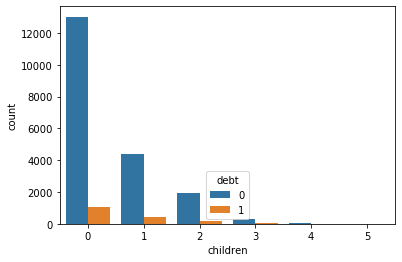

In [82]:
sns.countplot(x='children', hue='debt', data=data)
plt.show()

In [83]:
data.groupby('children')['debt'].sum()/data.groupby('children')['debt'].count()

children
0    0.075444
1    0.091658
2    0.094925
3    0.081818
4    0.097561
5    0.000000
Name: debt, dtype: float64

### Вывод

В каждой группе (бездетных, с 1 ребеноком, с 2мя детьми, с 3мя детьмя, с 4мя детьми) чуть менее 10% должников. 

Меншье всего должников 7.5% среди бездетных клиентов.

Больше всего 9.8% и 9.5% среди клиентов с 4 детьми и 2 детьми.

Среди клиентов с 5ю (самая малочисленная группа) детьмя должников нет.

Можно сказать, что **если у клиента есть дети он скорее менее надежен, чем бездетные клиенты.**

- Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [84]:
data.groupby('family_status')['debt'].sum()

family_status
Не женат / не замужем    274
в разводе                 85
вдовец / вдова            63
гражданский брак         388
женат / замужем          931
Name: debt, dtype: int64

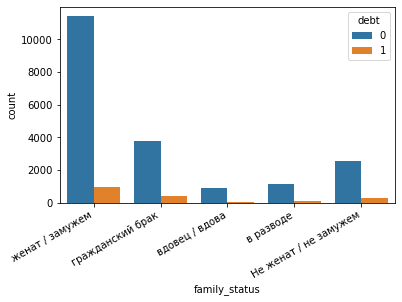

In [85]:
fig,ax=plt.subplots()
sns.countplot(x='family_status', hue= 'debt', data=data)
fig.autofmt_xdate()

In [86]:
data.groupby('family_status')['debt'].sum()/data.groupby('family_status')['debt'].count()

family_status
Не женат / не замужем    0.097509
в разводе                0.071130
вдовец / вдова           0.065693
гражданский брак         0.093494
женат / замужем          0.075452
Name: debt, dtype: float64

### Вывод

В каждой группе чуть меньше 10% должников. 

Меньше всего должников 6.6% у вдовцов/вдов, 7% у клиентов в разводе и 7.5% женатых/замужних клиентов.

Больше всего должников среди 9.8% и 9.3% среди неженатых/незамужних и клиентов в гражданском браке.

Можно сказать, что **вероятноть долга по кредиту у клиентов, которые не состояли в официальных отношениях - чуть выше**.

- Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Чтобы ответить на этот вопрос, необходимо категоризовать признак total_income.

In [87]:
data.total_income.describe()

count    2.145300e+04
mean     1.674770e+05
std      9.807270e+04
min      2.066700e+04
25%      1.076200e+05
50%      1.537150e+05
75%      2.035960e+05
max      2.265604e+06
Name: total_income, dtype: float64

Категоризуем доход по 25-, 50-, 75-, 100-персентилям. Используем константы.

In [88]:
Q_25 = data.total_income.quantile(0.25)
Q_50 = data.total_income.quantile(0.5)
Q_75 = data.total_income.quantile(0.75)
Q_100 = data.total_income.quantile(1)

In [89]:
def income_to_category(income):
    if income <= Q_25:
        return 'низкий'
    if income <= Q_50:
        return 'средний'
    if income <= Q_75:
        return 'высокий'
    if income <= Q_100:
        return 'очень высокий'

data['total_income_type'] = data['total_income'].apply(income_to_category)
data['total_income_type'].value_counts()

средний          6634
низкий           5364
очень высокий    5363
высокий          4092
Name: total_income_type, dtype: int64

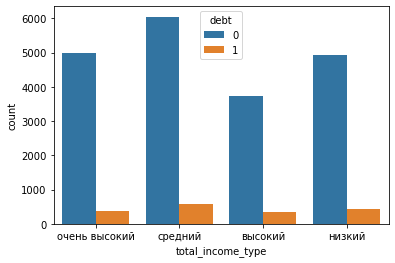

In [90]:
sns.countplot(x='total_income_type', hue='debt', data=data)
plt.show()

In [91]:
data.groupby('total_income_type')['debt'].sum()

total_income_type
высокий          355
низкий           427
очень высокий    367
средний          592
Name: debt, dtype: int64

In [92]:
data.groupby('total_income_type')['debt'].sum()/data.groupby('total_income_type')['debt'].count()

total_income_type
высокий          0.086755
низкий           0.079605
очень высокий    0.068432
средний          0.089237
Name: debt, dtype: float64

### Вывод

Интересно, что уровень дохода слабо влияет на возврат кредита в срок. Однако это может быть особенностью наших данных, так как верхняя граница минимального дохода 107620.9 всего лишь в два раза больше 75% персентили 202417.5. У клиентов достаточно высокий уровень дохода.

Для каждой группы клиентов по уровню дохода - вероятность не возврата кредита меньше 10%. 

Меньше всего должников среди клиентов с очень высоким уровнем дохода 6.8%.


- Как разные цели кредита влияют на его возврат в срок?

In [93]:
data.groupby('purpose')['debt'].sum()

purpose
автомобиль      403
недвижимость    782
образование     370
свадьба         186
Name: debt, dtype: int64

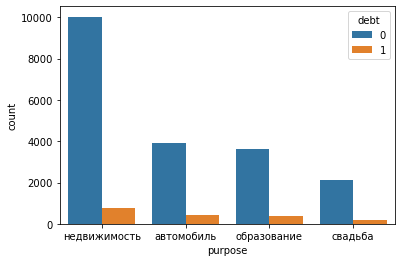

In [94]:
sns.countplot(x='purpose', hue='debt', data=data)
plt.show()

In [95]:
data.groupby('purpose')['debt'].sum() / data.groupby('purpose')['debt'].count()

purpose
автомобиль      0.093590
недвижимость    0.072334
образование     0.092200
свадьба         0.080069
Name: debt, dtype: float64

### Вывод

Среди каждой группы по цели кредита - должников меньше 10%.

Большое всего должников 9.4% и 9.2% у клиентов с целью автомобиль и образование.

Меньше всего должников 7.2% среди клиентов с целью кредита недвижимость.

- Как образование клиента влияет на возврат кредита в срок?

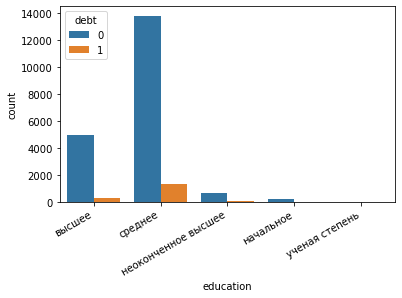

In [96]:
fig,ax=plt.subplots()
sns.countplot(x='education', hue= 'debt', data=data)
fig.autofmt_xdate()

In [97]:
data.education.unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

In [98]:
data.groupby('education')['debt'].sum() / data.groupby('education')['debt'].count()

education
высшее                 0.052952
начальное              0.109929
неоконченное высшее    0.091398
среднее                0.089908
ученая степень         0.000000
Name: debt, dtype: float64

Чем выше уровень образования, тем более надежным явлется клиент. 

Среди клиентов с высшим образованием 5% должников.

Среди клиентов с начальным, средним и неоконченным высшим 9-11% должников.

### Шаг 4. Общий вывод

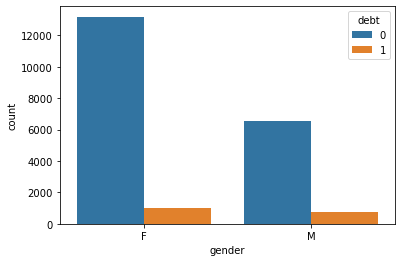

In [99]:
sns.countplot(x='gender', hue='debt', data=data)
plt.show()

In [100]:
data[data.gender=='F']['debt'].sum()/data[data.gender=='F'].shape[0]

0.07012840412022012

In [101]:
data[data.gender=='M']['debt'].sum()/data[data.gender=='M'].shape[0]

0.10262398681137519

In [102]:
data_pivot = data.pivot_table(index=['family_status','gender'], columns='children', values='debt', aggfunc='mean').fillna(0)
data_pivot

children                             0         1         2         3  \
family_status         gender                                           
Не женат / не замужем F       0.061469  0.085890  0.116667  0.000000   
                      M       0.137931  0.187500  0.125000  1.000000   
в разводе             F       0.069731  0.054622  0.068966  0.000000   
                      M       0.071895  0.102564  0.160000  0.333333   
вдовец / вдова        F       0.053683  0.078947  0.150000  0.000000   
                      M       0.217391  0.200000  0.000000  0.000000   
гражданский брак      F       0.070626  0.101620  0.098425  0.194444   
                      M       0.112791  0.152648  0.079208  0.050000   
женат / замужем       F       0.059570  0.072182  0.108672  0.071942   
                      M       0.087108  0.097257  0.073025  0.063636   

children                             4    5  
family_status         gender                 
Не женат / не замужем F       0.500000  0.0  
                      M       0.000000  0.0  
в разводе             F       0.000000  0.0  
                      M       0.000000  0.0  
вдовец / вдова        F       0.000000  0.0  
                      M       0.000000  0.0  
гражданский брак      F       0.000000  0.0  
                      M       0.000000  0.0  
женат / замужем       F       0.000000  0.0  
                      M       0.272727  0.0

У незамужних женщин с одним ребенком процент просрочек 0.08589. Однако нужно помнить, что здесь в каждой группе может быть довольно мало клиентов.

In [103]:
data['total_income'].median()

153715.0

**Рекоменадции, которые нужно учесть при построении модели кредитного скоринга**:

1) Количество детей: бездетные клиенты более надёжные (среди них 7.5% должников), чем клиенты с одним и более ребенком (среди них 8-10% должников).

2) Семейное положение: клиенты, которые состоят или раньше состояли в официальных отношениях (замужние/женатые, в разводе, вдовец/вдова), более надёжные (среди них 6.6%-7.6% должников), чем неженатые/незамужние клиенты и клиенты в гражданском браке (среди них 9.3% и 9.8% должников).

3) Уровень дохода: особеностью данных явлется высокий средний уровень дохода (около 150000 руб.) и более надёжными ялвяются клиенты с очень высоким (среди них 6.8% дожлников), чуть менее наджёные клиенты с высоким, средним и низким уровнем дохода (среди них 8-9% должников).

4) Цель кредита: клиенты, которые берут кредиты на жилье/недвижимость и свадьбу, более надёжные (среди них 7-8% дожников), чем клиенты, которые берут кредиты на автомобиль и образование (среди них 9.3% должников).

5) Пол: женщины более надежные клиенты (среди них 7% должников), чем мужчины (среди них 10% должников).

6) Образование: люди с высшим образованием более надежные (среди них 5% должников), чем без него (среди таких 9-11% должников).